## ES 335 Assignment

### 1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Ans. For a direct matrix multiplication, n*k*m multiplication and n*(k-1)*m addition is required.
    Explaination: In matrix muliplication the column of first matrix is multiplied with the row of second matrix and then their value is added. So in that case each k values are multipled with each other so in each step their will be k multiplication. Then all k values are add so their will be k-1 additions. And this process repeats for all combination of n rows of 1st matrix and m columns of second matrix.

    But if we use Strassen’s Algorithm then the number of multiplication and addition will be less.

### 2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [ ]:
import numpy as np

def matrix_mult(mtx1, mtx2):

    assert len(mtx1[0]) == len(mtx2)

    final_mtx = []

    for n in range(len(mtx1)):
        mtx = []
        for m in range(len(mtx2[0])):
            val=0
            for k in range(len(mtx2)):
                val+=mtx1[n][k] * mtx2[k][m]
            mtx.append(val)
        final_mtx.append(mtx)

    return final_mtx

In [ ]:
mtx1 = [[1,2,3,4]]*1000000
mtx2 = [[1,2,3,4,5,6,7,8,9,0],
        [1,2,3,4,5,6,7,8,9,0],
        [1,2,3,4,5,6,7,8,9,0],
        [1,2,3,4,5,6,7,8,9,0]]
matrix_mult(mtx1, mtx2)

In [ ]:
np.matmul(mtx1, mtx2)

My function took 4 secs calculate while numpy took 0 sec. I Googled the reason and found out that its uses a BLAS library which is optimised for Linear algebra.

### 3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Ans. The time complexity to find median of an array by linearly search from highest to median value is O(n^2) thats because the code has to do n + (n-1) + (n-2) + (n-3) + .... + n/2 searches. And the sum of this sum is O(n^2).

A better option can be sorting the array using heap sort which has time complexity O(nlog(n)). And then returning the middle element.

In [ ]:
import heapq

def linear_method(array):

    n = len(array)

    for i in range(int((n)/2)):
        max = - np.inf
        pos = 0
        for j in range(n-i):
            if array[j] > max:
                max = array[j]
                pos = j

        array[pos], array[j] = array[j], array[pos]
        
    return max

def heap_sort_method(array):

    n = len(array)
    array = list(array)

    heapq.heapify(array)

    sorted_arr = []
    while array:
        
        smallest = heapq.heappop(array)
        sorted_arr.append(smallest)

    return sorted_arr[n//2]

    

list1 = np.random.randint(0, 10000, 100000)            

In [ ]:
linear_method(list1)

In [ ]:
heap_sort_method(list1)

In [ ]:
np.median(list1)

### 4. What is the gradient of the following function with respect to x and y?

    x^2*y + y^3*sin(x)

(2xy + y^3 * cosx)i , (x^2 + 3y^2*sinx)j

In [ ]:
def mah_func(x, y):

    return (2*x*y + (y**3) * jax.numpy.cos(x), x**2 + 3*(y**2)*jax.numpy.sin(x))

### 5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [ ]:
import jax

def jax_grad(x, y):

    f = lambda x,y: (x**2) * y + (y**3) * jax.numpy.sin(x)

    dfdxy = jax.grad(f, argnums=(0, 1))
    return (dfdxy(x, y))

In [ ]:
for _ in range(100):

    x = np.random.rand(2)
    x = [1.,2.]
    m_output = mah_func(x[0], x[1])
    j_output = jax_grad(x[0], x[1])
    
    assert m_output == j_output

### 6. Use sympy to confirm that you obtain the same gradient analytically.

In [301]:
import sympy as sp

In [305]:
x, y = sp.symbols('x y')

f = (x**2) * y + (y**3) * sp.sin(x)

In [306]:
f.diff(x)

2*x*y + y**3*cos(x)

In [307]:
f.diff(y)

x**2 + 3*y**2*sin(x)

### 7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

2022
    Branch 1
        Roll Number: 1, Name: N, Marks:
            Maths: 100, English: 70 …
    Branch 2
2023
    Branch 1
    Branch 2
2024
    Branch 1
    Branch 2
2025
    Branch 1
    Branch 2

In [10]:
student_db = {
    2022: {
        'Branch 1':{
            'roll number: 1': {
            'Name:': 'A',
            'Marks' : {
                "Maths": 100,
                "English": 70,
                "ML": 90
                }
            },
            'roll number: 2': {
            'Name:': 'A',
            'Marks' : {
                "Maths": 100,
                "English": 70,
                "ML": 90
                }
            }
        },
        'Branch 2':{
            'roll number: 1': {
            'Name:': 'A',
            'Marks' : {
                "Maths": 100,
                "English": 70,
                "ML": 90
                }
            },
            'roll number: 2': {
            'Name:': 'A',
            'Marks' : {
                "Maths": 100,
                "English": 70,
                "ML": 90
                }
            }
        }
    },
    2023: {
        'Branch 1':{
            'roll number: 1': {
            'Name:': 'A',
            'Marks' : {
                "Maths": 100,
                "English": 70,
                "ML": 90
                }
            },
            'roll number: 2': {
            'Name:': 'A',
            'Marks' : {
                "Maths": 100,
                "English": 70,
                "ML": 90
                }
            }
        },
        'Branch 2':{
            'roll number: 1': {
            'Name:': 'A',
            'Marks' : {
                "Maths": 100,
                "English": 70,
                "ML": 90
                }
            },
            'roll number: 2': {
            'Name:': 'A',
            'Marks' : {
                "Maths": 100,
                "English": 70,
                "ML": 90
                }
            }
        }
    },
    2024: {
        'Branch 1':{
            'roll number: 1': {
            'Name:': 'A',
            'Marks' : {
                "Maths": 100,
                "English": 70,
                "ML": 90
                }
            },
            'roll number: 2': {
            'Name:': 'A',
            'Marks' : {
                "Maths": 100,
                "English": 70,
                "ML": 90
                }
            }
        },
        'Branch 2':{
            'roll number: 1': {
            'Name:': 'A',
            'Marks' : {
                "Maths": 100,
                "English": 70,
                "ML": 90
                }
            },
            'roll number: 2': {
            'Name:': 'A',
            'Marks' : {
                "Maths": 100,
                "English": 70,
                "ML": 90
                }
            }
        }
    },
    2025: {
        'Branch 1':{
            'roll number: 1': {
            'Name:': 'A',
            'Marks' : {
                "Maths": 100,
                "English": 70,
                "ML": 90
                }
            },
            'roll number: 2': {
            'Name:': 'A',
            'Marks' : {
                "Maths": 100,
                "English": 70,
                "ML": 90
                }
            }
        },
        'Branch 2':{
            'roll number: 1': {
            'Name:': 'A',
            'Marks' : {
                "Maths": 100,
                "English": 70,
                "ML": 90
                }
            },
            'roll number: 2': {
            'Name:': 'A',
            'Marks' : {
                "Maths": 100,
                "English": 70,
                "ML": 90
                }
            }
        }
    }
}

### 8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [14]:
class Student_DB:

    def __init__(self) -> None:
        self.DB = None
    
    def batch(self):

        self.BD.batch = input("Create a batch")

    def branch(self):

        self.BD.batch.branch = input("Create a branch")

    def Student_details(self):

        self.BD.batch.branch.roll_number = input("Add roll number")
        self.BD.batch.branch.Name = input("Add Name")


        

In [168]:
class Student_DB:

    def __init__(self):
        self.DB = {}

    class Batch:
        def __init__(self, batch_name):
            self.batch = batch_name
            self.branches = {}

        class Branch:
            def __init__(self, branch_name):
                self.branch = branch_name
                self.students = {}
            
            class Student_details:
                def __init__(self, roll_number, name):
                    self.roll_number = roll_number
                    self.Name = name
                    self.marks = None

                class Marks():
                    def __init__(self, maths, english, ml):
                        self.Maths = maths
                        self.English = english
                        self.ML = ml

    def create_batch(self, batch_name):

        self.DB[batch_name] = self.Batch(batch_name)
    
    def create_branch(self, batch, branch_name):

        self.DB[batch].branches[branch_name] = self.DB[batch].Branch(branch_name)

    def create_student(self, batch, branch_name, roll_number, name):

        self.DB[batch].branches[branch_name].students[roll_number] = self.DB[batch].branches[branch_name].Student_details(roll_number, name)

    def add_marks(self, batch, branch, roll_number, maths, english, ml):

        self.DB[batch].branches[branch].students[roll_number].marks = self.DB[batch].branches[branch].students[roll_number].Marks(maths, english, ml) 


        

In [178]:
ST = Student_DB()

ST.create_batch('2022')
ST.create_branch('2022', 'branch1')
ST.create_student('2022', 'branch1', '1', 'A')
ST.add_marks('2022', 'branch1', '1', 23, 44, 56)
ST.create_student('2022', 'branch1', '2', 'B')
ST.add_marks('2022', 'branch1', '1', 43, 64, 86)
ST.create_student('2022', 'branch1', '3', 'C')
ST.add_marks('2022', 'branch1', '1', 83, 14, 76)

ST.create_branch('2022', 'branch2')
ST.create_student('2022', 'branch2', '1', 'D')
ST.add_marks('2022', 'branch2', '1', 38, 49, 26)
ST.create_student('2022', 'branch2', '2', 'E')
ST.add_marks('2022', 'branch2', '2', 93, 34, 76)
ST.create_student('2022', 'branch2', '3', 'F')
ST.add_marks('2022', 'branch2', '3', 93, 84, 46)

ST.create_batch('2023')
ST.create_branch('2023', 'branch1')
ST.create_student('2023', 'branch1', '1', 'G')
ST.add_marks('2023', 'branch1', '1', 23, 44, 56)
ST.create_student('2023', 'branch1', '2', 'H')
ST.add_marks('2023', 'branch1', '2', 43, 64, 86)
ST.create_student('2023', 'branch1', '3', 'I')
ST.add_marks('2023', 'branch1', '3', 83, 14, 76)

ST.create_branch('2023', 'branch2')
ST.create_student('2023', 'branch2', '1', 'J')
ST.add_marks('2023', 'branch2', '1', 38, 49, 26)
ST.create_student('2023', 'branch2', '2', 'K')
ST.add_marks('2023', 'branch2', '2', 93, 34, 76)
ST.create_student('2023', 'branch2', '3', 'L')
ST.add_marks('2023', 'branch2', '3', 93, 84, 46)

### 9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

In [186]:
import matplotlib.pyplot as plt
import numpy as np

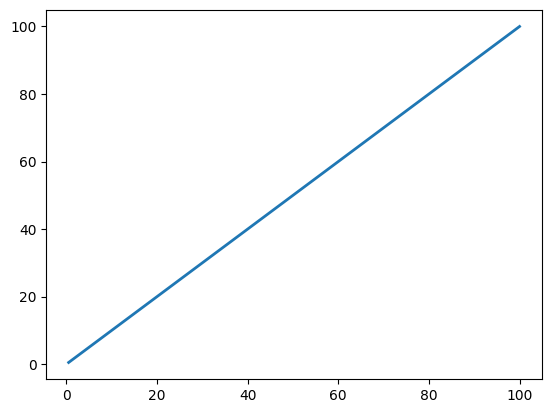

In [204]:
# y = x
def y(x):
    return x

t1 = np.arange(0.5, 100.5, 0.5)

plt.figure()
plt.plot(t1, y(t1), linewidth=2.0)

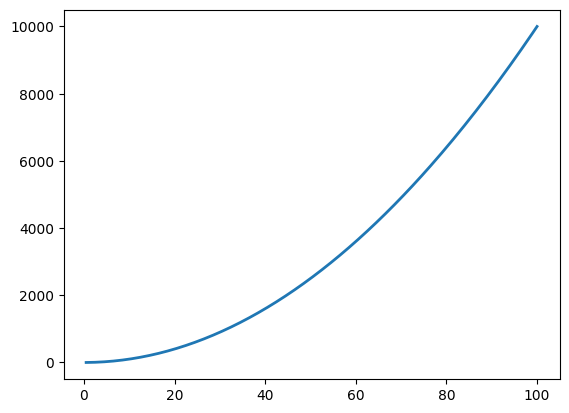

In [205]:
# y = x^2
def y(x):
    return x**2

t1 = np.arange(0.5, 100.5, 0.5)

plt.figure()
plt.plot(t1, y(t1), linewidth=2.0)

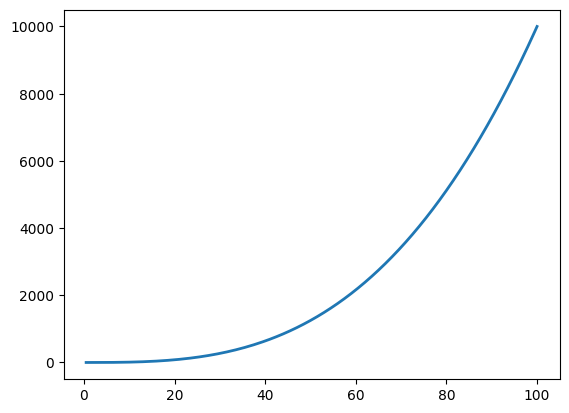

In [206]:
def y(x):
    return (x**3)/100

t1 = np.arange(0.5, 100.5, 0.5)

plt.figure()
plt.plot(t1, y(t1), linewidth=2.0)

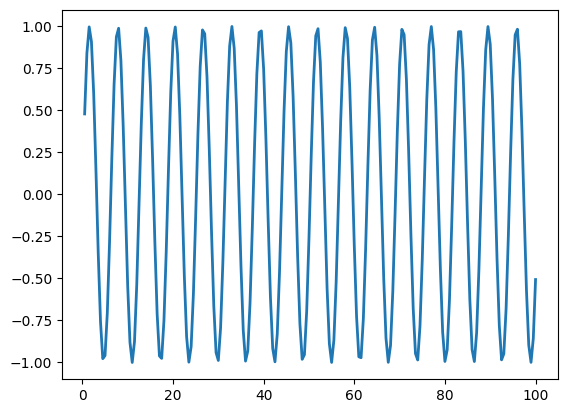

In [200]:
def y(x):
    return np.sin(x)

t1 = np.arange(0.5, 100.5, 0.5)

plt.figure()
plt.plot(t1, y(t1), linewidth=2.0)

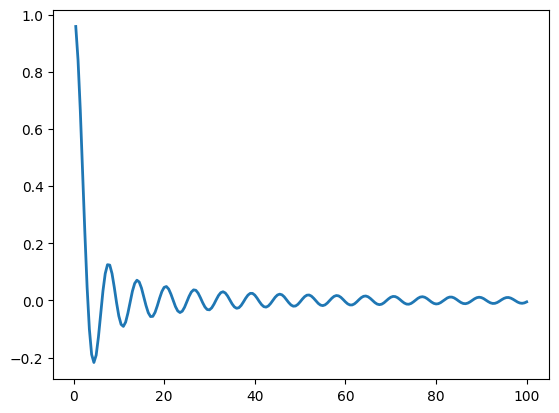

In [201]:
def y(x):
    return np.sin(x)/x

t1 = np.arange(0.5, 100.5, 0.5)

plt.figure()
plt.plot(t1, y(t1), linewidth=2.0)

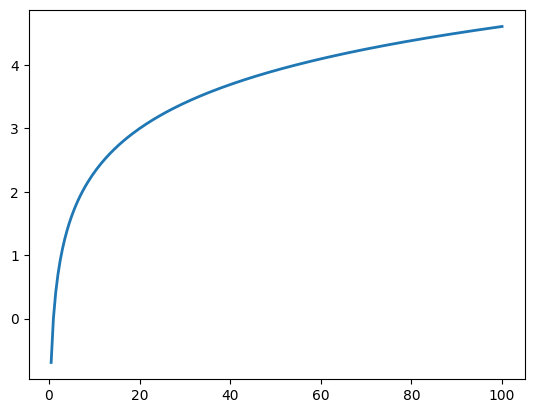

In [202]:
def y(x):
    return np.log(x)

t1 = np.arange(0.5, 100.5, 0.5)

plt.figure()
plt.plot(t1, y(t1), linewidth=2.0)

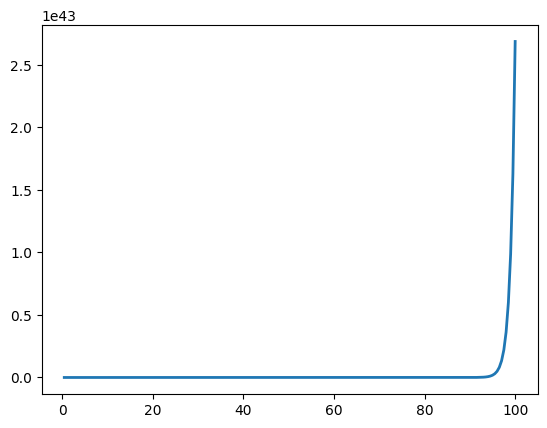

In [203]:
def y(x):
    return np.exp(x)

t1 = np.arange(0.5, 100.5, 0.5)

plt.figure()
plt.plot(t1, y(t1), linewidth=2.0)

### 10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [235]:
import pandas as pd

In [236]:
matrix = np.random.uniform(1,2,(20,5))
matrix

array([[1.01401001, 1.59260528, 1.41815199, 1.21809641, 1.13154769],
       [1.94177246, 1.21067529, 1.91672225, 1.61718406, 1.97174903],
       [1.91508505, 1.11015061, 1.98772213, 1.32683795, 1.40279077],
       [1.28912487, 1.27310297, 1.13984255, 1.09163242, 1.27407788],
       [1.17116181, 1.50017944, 1.82848304, 1.16623936, 1.35023097],
       [1.7536949 , 1.13305907, 1.52384117, 1.4216026 , 1.57412515],
       [1.06822729, 1.53458753, 1.39125662, 1.19689148, 1.59615535],
       [1.95922084, 1.78936406, 1.73236283, 1.40150425, 1.08327548],
       [1.02070855, 1.11528736, 1.66158057, 1.37454223, 1.67790906],
       [1.14758977, 1.80409111, 1.25961952, 1.83242495, 1.81403161],
       [1.54871673, 1.79860551, 1.87069073, 1.42267532, 1.06409071],
       [1.97841486, 1.42638335, 1.65634735, 1.83806868, 1.59926436],
       [1.7374234 , 1.25171084, 1.63705623, 1.28313037, 1.08117638],
       [1.36207613, 1.98769651, 1.78504734, 1.54282681, 1.02917862],
       [1.05442039, 1.37285839, 1.

In [243]:
df = pd.DataFrame(matrix, columns=['a','b','c','d','e'])
df

,a,b,c,d,e
0,1.014010,1.592605,1.418152,1.218096,1.131548
1,1.941772,1.210675,1.916722,1.617184,1.971749
2,1.915085,1.110151,1.987722,1.326838,1.402791
3,1.289125,1.273103,1.139843,1.091632,1.274078
4,1.171162,1.500179,1.828483,1.166239,1.350231
5,1.753695,1.133059,1.523841,1.421603,1.574125
6,1.068227,1.534588,1.391257,1.196891,1.596155
7,1.959221,1.789364,1.732363,1.401504,1.083275
8,1.020709,1.115287,1.661581,1.374542,1.677909
9,1.147590,1.804091,1.259620,1.832425,1.814032


In [244]:
df.describe()

,a,b,c,d,e
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,1.436341,1.476086,1.595322,1.452431,1.432041
std,0.369008,0.278947,0.290783,0.250198,0.302043
min,1.014010,1.110151,1.109756,1.091632,1.029179
25%,1.082572,1.241452,1.364322,1.266872,1.167963
50%,1.325601,1.463281,1.658964,1.411553,1.376511
75%,1.790981,1.737531,1.839035,1.611922,1.618926
max,1.978415,1.987697,1.987722,1.953110,1.971749


Column a has highest standard deviation

### 11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [245]:
df['f'] = df['a'] + df['b'] + df['c'] + df['d'] + df['e']

In [246]:
df['g'] = None
for i in range(len(df)):
    if df['f'][i] < 8:
        df.loc[i, 'g'] = 'LT8'
    else:
        df.loc[i, 'g'] = 'GT8'

In [247]:
df

,a,b,c,d,e,f,g
0,1.014010,1.592605,1.418152,1.218096,1.131548,6.374411,LT8
1,1.941772,1.210675,1.916722,1.617184,1.971749,8.658103,GT8
2,1.915085,1.110151,1.987722,1.326838,1.402791,7.742587,LT8
3,1.289125,1.273103,1.139843,1.091632,1.274078,6.067781,LT8
4,1.171162,1.500179,1.828483,1.166239,1.350231,7.016295,LT8
5,1.753695,1.133059,1.523841,1.421603,1.574125,7.406323,LT8
6,1.068227,1.534588,1.391257,1.196891,1.596155,6.787118,LT8
7,1.959221,1.789364,1.732363,1.401504,1.083275,7.965727,LT8
8,1.020709,1.115287,1.661581,1.374542,1.677909,6.850028,LT8
9,1.147590,1.804091,1.259620,1.832425,1.814032,7.857757,LT8


### 12. Write a small piece of code to explain broadcasting in numpy.

It makes matrix multiplication or addition faster without running any kind of loops.(I used this technique earlier but didn't knew it is called broadcasting.)


In [252]:
arr1 = np.array([1,2,3])
print(arr1*2)

arr1 = np.array([[1,2,3],[4,5,6]])
arr2 = np.array([2,2,2])
print(arr2*arr1)

[2 4 6]
[[ 2  4  6]
 [ 8 10 12]]


### 13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [274]:
def mah_argmin(array):

    min = np.inf
    index = -1
    for pos, i in enumerate(array):
        if i < min:
            index = pos
            min = i
    return index


In [276]:
array = np.random.randint(-100,100,100)
assert mah_argmin(array) == np.argmin(array)